# Introduction to Data Science
## Homework 5

Student Name: 

Student Netid:
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

The useful point of Laplace smoothing is to change the zero-values of your data into small positive number to prevent fail your entire process.  When you change the zero value, you should pay attention to reduce other values and the total sum of probability maintains 1 at the same time.
Considering,
y_pred=argmaxP(y)P(x_1|y)P(x_2|y)···P(x_n|y)for instance
Step1
First, you had 30 spam emails and 70 non-spam emails, then you hadP(spam) =0.3,P(non−spam)=0.7···(∗1)
Now,maintaining the total sum of probability is1, 
changes to 31 spam emailsand 69 non-spam emails.P(spam) = 0.31,P(non−spam) = 0.69···(∗2)
(∗1)and(∗2)belong to P(y) and the latter value should be decreased considering the augmentation in the process of (∗3)→(∗4)
Step2
Think about P(x1|y).
Assume you originally had ’buy’ in 10 out of 40 spam emails and in no non-spam-emails,
P(buy|spam) =0.25,P(buy|non−spam) = 0···(∗3)
”P(buy|non−spam) = 0” leads the entire process to fail by being multipliedsince the value is zero. 
That is, ypred=argmaxP(y)P(buy|non−spam)P(x_2|y)···P(x_n|y) = 0 
So,this  phenomenon  yields  this  model  bad.   To  prevent  this  disadvantageous process, you should use Laplace smoothing. Based  on  this  concept, I try to change the zero value into the small positive number.  
To change, suppose you had ’buy’ in 12 out of 41 spamemails and in 2 out of 200 spam emails.
P(buy|spam) = 0.29,P(buy|non−spam) = 0.01···(∗4)
y_pred = argmaxP(y)P(buy|non−spam)P(x_2|y)···P(x_n|y) != 0 
You can hamper the entire-process from failing by the Laplace smoothing.  
In specifically,
Suppose P_{emperical}=x_i/N= 0, then you should employ the Laplace smoothing like this 
P_{α−smoothed}=xi/{α + αd} where d is constant.
You could see that α varies and there is tradeoff between variance and bias:
If α is small, it leads to high variance.
If α is large, it leads to high bias.

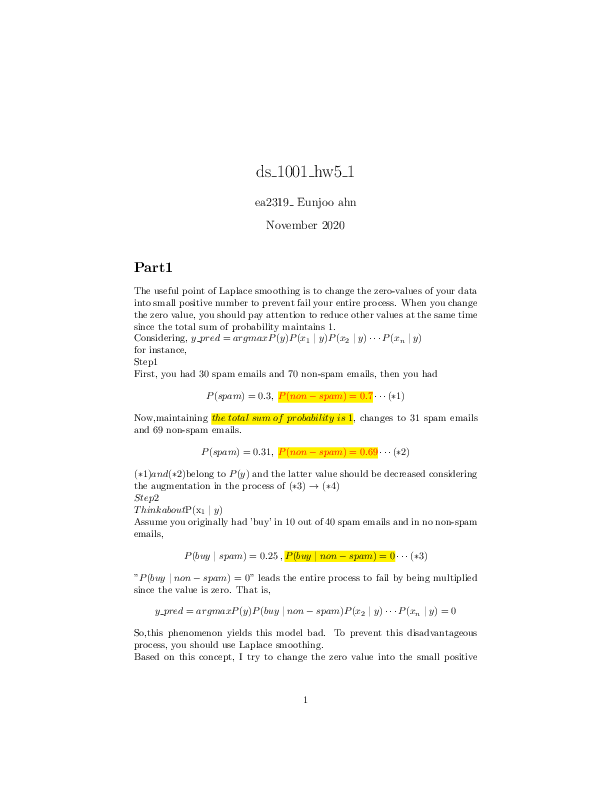

In [1]:
from wand.image import Image as WImage
img = WImage(filename='ds_1001_hw5_1.pdf')
img

Answer here!

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [26]:
# Code here
import numpy as np
import pandas as pd
imdv_data=pd.read_csv('imdb.csv',header=0, sep=',') 
imdv_data

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N
...,...,...
8495,'Alright friends a serious movie buff is expec...,N
8496,'I found this film embarrassing to watch. I fe...,N
8497,'To put it simply I am not fond of westerns. A...,N
8498,'Some of these viewer comments are just ridicu...,N


In [27]:

#Code here
#df.[‘column_name’]
imdv_data.rename(columns={"Text": "X", "Class": "Y"})
from sklearn.model_selection import train_test_split
imdv_train, imdv_test = train_test_split(imdv_data,train_size=0.75, test_size=None)
imdv_train,imdv_test
X_train=imdv_train["Text"]
X_test=imdv_test["Text"]
Y_train=imdv_train["Class"]
Y_test=imdv_test["Class"]
X_train,X_test,Y_train,Y_test

(1434    'Although I have to admit I laughed more watch...
 4644    'If your idea of a thriller is car chases expl...
 2017    'If you want to learn something about the Span...
 2744    'This documentary was interesting but it was a...
 725     'What a dreadful movie! For some reason scient...
                               ...                        
 2015    'I resisted seeing this movie and I understand...
 3891    'Largely dense road movie with some comic reli...
 7847    'I must admit at first I wasnt expecting anyth...
 2191    'Over-powered mobile suits that can annihilate...
 7473    'Some of those guys that watch films and compl...
 Name: Text, Length: 6375, dtype: object,
 2417    'When my now college age daughter was in presc...
 1062    'After watching this film I was left with a tw...
 3954    'If you are studying Welles and want to see ju...
 6902    'Question: how does a bourgeois director treat...
 6       'National Lampoon Goes to the Movies (1981) is...
              

In [28]:
Y_train_num=Y_train.replace("P", 1).replace("N",0)
Y_train_num

1434    0.0
4644    1.0
2017    1.0
2744    1.0
725     0.0
       ... 
2015    1.0
3891    0.0
7847    1.0
2191    1.0
7473    1.0
Name: Class, Length: 6375, dtype: float64

In [13]:
Y_test_num=Y_test.replace("P", 1).replace("N",0)
Y_test_num

3406    1.0
2756    0.0
2256    1.0
622     1.0
3939    0.0
       ... 
5426    1.0
6911    0.0
3794    0.0
7691    0.0
7082    0.0
Name: Class, Length: 2125, dtype: float64

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [6]:
imdv_data.rename(columns={"Text": "X", "Class": "Y"})

,X,Y
0,'One of the first of the best musicals Anchors...,1.0
1,'Visually disjointed and full of itself the di...,0.0
2,'These type of movies about young teenagers st...,1.0
3,'I would rather of had my eyes gouged out with...,0.0
4,'The title says it all. Tail Gunner Joe was a ...,0.0
...,...,...
8495,'Alright friends a serious movie buff is expec...,0.0
8496,'I found this film embarrassing to watch. I fe...,0.0
8497,'To put it simply I am not fond of westerns. A...,0.0
8498,'Some of these viewer comments are just ridicu...,0.0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [13]:
#Code here
from sklearn.model_selection import train_test_split
imdv_train, imdv_test = train_test_split(imdv_data,train_size=0.75, test_size=None)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /Users/ahn-
[nltk_data]     eunjoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
bigram_vectorizer1 = CountVectorizer(ngram_range=(0, 1),
                                  token_pattern=r'\b\w+\b', min_df=1,stop_words='english')

In [16]:
X_11 = bigram_vectorizer1.fit_transform(X_train).toarray()
X_11

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import numpy as np
import pandas as pd
nan_array = np.isnan(X_11)
not_nan_array = ~ nan_array
array1 = X_11[not_nan_array]
array1 

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
len(array1)

286875000

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
logistic_regression= LogisticRegression()
logistic_regression.fit(array2 ,array1)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
X_11_data=pd.DataFrame(X_11)
X_11_data

,0,1,2,3,4,5,6,7,8,9,...,577092,577093,577094,577095,577096,577097,577098,577099,577100,577101
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bigram_vectorizer3 = CountVectorizer(ngram_range=(0, 1),
                                  token_pattern=r'\b\w+\b', min_df=1,stop_words='english')

In [32]:
X_12 = bigram_vectorizer1.fit_transform(X_train).toarray()
X_12

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
logistic_regression= LogisticRegression()
logistic_regression.fit(X_11,Y_train_num)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Mylogistic=logistic_regression.fit(X_11,Y_train_num)

In [ ]:
from sklearn.decomposition import PCA


In [28]:
new_data=np.concatenate([X_11_data, Y_train])


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
new_data

In [ ]:
X_1_data=pd.DataFrame(X_1)
X_1_data

In [36]:
X_2=bigram_vectorizer1.fit_transform(B).toarray()
X_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
bigram_vectorizer2 = TfidfVectorizer(ngram_range=(1, 2),
                                  token_pattern=r'\b\w+\b', min_df=1,stop_words='english')

In [37]:
X_3 = bigram_vectorizer2.fit_transform(A).toarray()
X_3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [38]:
X_4 = bigram_vectorizer2.fit_transform(B).toarray()
X_4

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
len(A)

107

In [78]:
vectorizer1 = TfidfVectorizer(stop_words='english')
X_train_tran = vectorizer1.fit_transform(A)
X_train_tran

<107x37 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [79]:
vectorizer1 = TfidfVectorizer()
X_test_tran = vectorizer1.fit_transform(B)
X_test_tran

<192x126 sparse matrix of type '<class 'numpy.float64'>'
	with 179 stored elements in Compressed Sparse Row format>

In [81]:
vectorizer2=CountVectorizer()
X_train_tran_CV = vectorizer2.fit_transform(B)
X_train_tran_CV

<192x126 sparse matrix of type '<class 'numpy.int64'>'
	with 179 stored elements in Compressed Sparse Row format>

In [75]:
vectorizer2=CountVectorizer()
X_train_tran_CV = vectorizer2.fit_transform(A)
X_train_tran_CV

AttributeError: 'int' object has no attribute 'lower'

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [21]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Code here

In [24]:
X_train_tran.shape

(249, 148)

In [26]:
Y_train.shape

(6375,)

In [27]:
Y_test.shape

(2125,)

In [23]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_tran,Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
X_train_tran.shape

(205, 117)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
stop_words = set(stopwords.words('english')) 

Explanation here!

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [ ]:
# Code here to display 5 incorrect reviews.

Explanation for the 5 reviews chosen here!